# Smart Home Energy Classification using KNN
This notebook demonstrates how to use the K-Nearest Neighbors (KNN) algorithm to classify energy consumption in a smart home environment as 'High' or 'Low'.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('smart_home_energy_classification.csv')
data.head()

DateTime  Temperature   Humidity       Light         CO2  \
0  2023-01-01 00:00:00    18.745401  41.107976  335.535115  803.621797   
1  2023-01-01 01:00:00    24.507143  62.514057  322.280919  878.008838   
2  2023-01-01 02:00:00    22.319939  82.376750  915.629122  550.280739   
3  2023-01-01 03:00:00    20.986585  73.933493  324.591580  774.924460   
4  2023-01-01 04:00:00    16.560186  78.393669  344.754754  743.047590   

   HumidityRatio EnergyConsumption  
0       0.003716               Low  
1       0.004416              High  
2       0.004280              High  
3       0.002462              High  
4       0.002448               Low

In [3]:
# Feature selection and preprocessing
X = data[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y = data['EnergyConsumption']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [5]:
# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

In [6]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{class_report}')

Confusion Matrix:
[[ 80   9]
 [ 11 100]]
Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.90      0.89        89
         Low       0.92      0.90      0.91       111

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



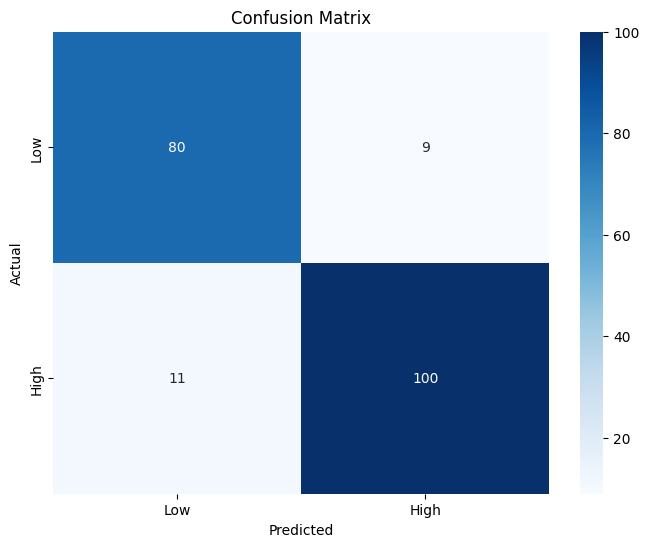

In [7]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
# Perform k-fold cross-validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print(f'Cross-Validated Accuracy: {cv_scores.mean()}')

Cross-Validated Accuracy: 0.5810000000000001


In [9]:
# Retrain the model using all data and check the performance again
knn.fit(X_train_scaled, y_train)
y_pred_final = knn.predict(X_test_scaled)

# Evaluate the final model
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
accuracy_final = accuracy_score(y_test, y_pred_final)
class_report_final = classification_report(y_test, y_pred_final)
print(f'Final Confusion Matrix:\n{conf_matrix_final}')
print(f'Final Accuracy: {accuracy_final}')
print(f'Final Classification Report:\n{class_report_final}')

Final Confusion Matrix:
[[ 80   9]
 [ 11 100]]
Final Accuracy: 0.9
Final Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.90      0.89        89
         Low       0.92      0.90      0.91       111

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



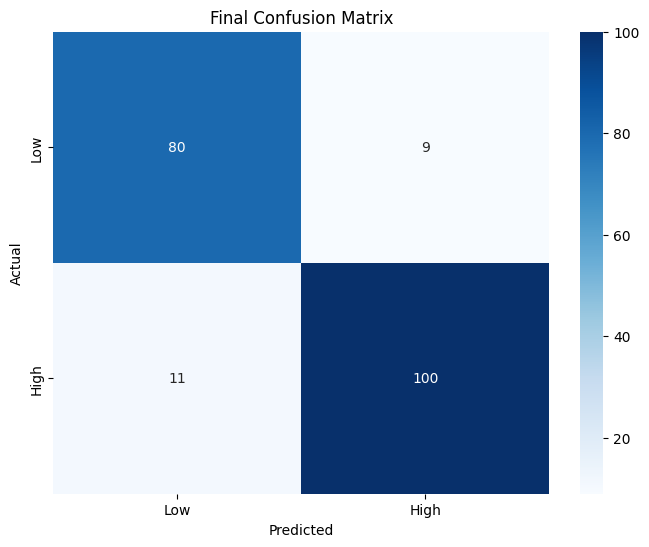

In [10]:
# Visualize the final confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix')
plt.show()